# Análsis de Becas ofrecidas por el ICETEX
#### Por: Equipo BecaPedia

## Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
%matplotlib inline

C:\Users\forid\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\forid\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\forid\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Cargar Datos

In [2]:
df=pd.read_csv("Icetex_Hist_rico_de_Becas.csv")
df.head()

,Codigo Convocatoria,Nombre del Oferente,Area del Conocimiento,Nombre del programa,Nombre del País,Fecha de Recepción -mm/dd/aaaa,Perfil del Aplicante,Objetivo del Programa
0,2127916,OEA - TOP - ARGENTINA,ADMINISTRACIÓN,POLÍTICAS DE GOBIERNO ABIERTO Y ACCESO A DATOS...,PLATAFORMA DE EDUCACIÓN A DISTANCIA TOP - OEA,05/27/2016 12:00:00 AM,El programa está dirigido a profesionales univ...,a) Proporcionar a los participantes un panoram...
1,3101616,ALIANZA DEL PACÍFICO-CHILE-MÉXICO-PERÚ,DIFERENTES AREAS,PLATAFORMA DE MOVILIDAD ESTUDIANTIL Y ACADÉMIC...,Chile (República de Chile),05/06/2016 12:00:00 AM,El programa está dirigido a profesionales univ...,El objetivo del Programa de Becas de Movilidad...
2,2221414,GOBIERNO DE LA INDIA,INGENIERIA Y AFINES,DATA COMMUNICATION & IP TECHNOLOGIES,India (República de India),07/30/2014 12:00:00 AM,"El Programa ""Comunicación de información y tec...",Ofrecer a los participantes entrenamiento y ac...
3,3001315,MINISTÈRE DE L'ENSEIGNEMENT SUPÈRIEUR - CANADÁ,MAESTRÍAS Y DOCTORADOS EN DIFERENTES ÁREAS,REDUCCIÓN DE COLEGIATURA EN UNIVERSIDADES QUEB...,Canadá (Canadá),06/10/2015 12:00:00 AM,El programa está dirigido a profesionales en d...,En la presente convocatoria se ofrece la posib...
4,4102316,ALIANZA DEL PACÍFICO-CHILE-MÉXICO-PERÚ,DIFERENTES AREAS,PLATAFORMA DE MOVILIDAD ESTUDIANTIL Y ACADÉMIC...,Perú (República del Perú),05/06/2016 12:00:00 AM,El programa está dirigido a estudiantes univer...,El objetivo del Programa de Becas de Movilidad...


## Exploración de datos

### División Por País Oferente

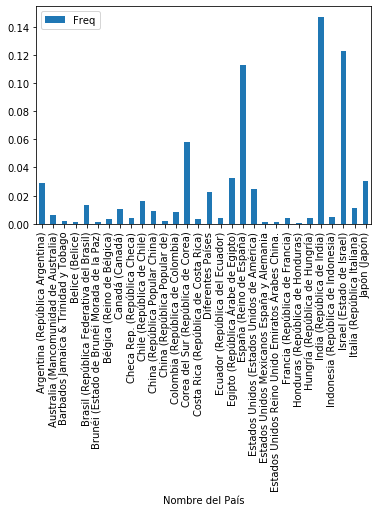

In [3]:
paises=pd.DataFrame(df['Nombre del País'].copy())
paises['Count']=1
paises=paises.groupby(['Nombre del País']).sum()
paises['Freq']=paises['Count']/sum(paises['Count'])
paises.sort_values(by='Freq', ascending=False)
paises.iloc[0:30].plot.bar(y='Freq')

### Areas de conocimiento

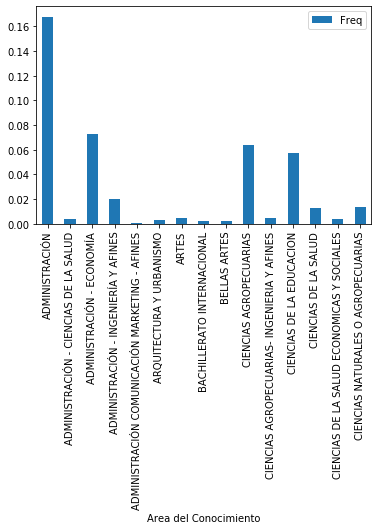

In [4]:
areas=pd.DataFrame(df['Area del Conocimiento'].copy())
areas['Count']=1
areas=areas.groupby(['Area del Conocimiento']).sum()
areas['Freq']=areas['Count']/sum(areas['Count'])
areas.sort_values(by='Freq', ascending=False)
areas.iloc[0:15].plot.bar(y='Freq')

### Análisis de Aspirante (K-Means)

In [5]:
aspirantes=pd.DataFrame(df['Perfil del Aplicante'].copy())
PL = Pipeline([('TFIDFV',TfidfVectorizer(ngram_range=(3,3),max_df=0.75,min_df=0.01)),
                ('KMEANS',KMeans(n_clusters=30,n_jobs=6,n_init=10,max_iter=2000))])
PL.fit_transform(aspirantes['Perfil del Aplicante'])
kmeans_Aspirante = PL.["KMEANS"]
order_centroids = PL['KMEANS'].cluster_centers_.argsort()[:, ::-1]
terms = PL['TFIDFV'].get_feature_names()
for i in range(30):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: de la india postgrado en países pregrado postgrado en bachillerato pregrado postgrado habla inglesa podrán de su diploma adjuntar copia de podrán adjuntar copia inglesa podrán adjuntar copia de su que hayan cursado hayan cursado estudios cursado estudios de de habla inglesa en países de países de habla las personas que personas que hayan escritura las personas de escritura las estén avaladas oficialmente oficialmente que describa numéricamente la habilidad oral comprensión auditiva expresión oral comprensión porcentual numéricamente la habilidad en expresión avaladas oficialmente que la habilidad en describa porcentual numéricamente
Cluster 1: ielts english test puntos ielts english 183 puntos ielts ibt 65 puntos 65 puntos prueba english test met por computador 183 computador 183 puntos test met b2 puntos prueba por prueba por computador puntaje mínimo toefl toefl por internet tener buenos conocimientos internet ibt 65 por internet ibt met b2 52 52 63 puntos b2 52 63 el cand

### Objetivo Programa (K-Means)

In [6]:
objetivo=pd.DataFrame(df['Objetivo del Programa'].copy())
PL = Pipeline([('TFIDFV',TfidfVectorizer(ngram_range=(3,3),max_df=0.75,min_df=0.01)),
                ('KMEANS',KMeans(n_clusters=30,n_jobs=6,n_init=10,max_iter=2000))])
PL.fit_transform(objetivo['Objetivo del Programa'])
order_centroids = PL['KMEANS'].cluster_centers_.argsort()[:, ::-1]
kmeans_Programa = PL.["KMEANS"]
terms = PL['TFIDFV'].get_feature_names()
for i in range(30):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: curso tiene como tiene como objetivo el curso tiene el programa de la experiencia de de las telecomunicaciones el desarrollo de proporcionar los participantes teniendo en cuenta en el desarrollo la capacidad de en la gestión el desarrollo del compartir la experiencia la gestión de través de la para el desarrollo de las herramientas herramientas prácticas para aspectos de la los participantes las la gestión del las tecnologías de de la experiencia el conocimiento de los participantes un de la gestión los participantes los importancia de la la importancia de
Cluster 1: oportunidad de realizar de realizar estudios la oportunidad de realizar estudios de con excelente desempeño académico la oportunidad excelente desempeño académico desempeño académico la colombianos con excelente de realizar una estudios de maestría maestría doctorado en virtud del convenio de matrícula en brindar la oportunidad profesionales colombianos con en virtud del colombianos de realizar de maestría docto

Función para calcular la afinidad gaussiana

In [2]:
  
def afinidad_gaussiana(x1,x2,dist = "euclidean",sigma=0.2):
    if dist=="euclidean":
        dist = numpy.linalg.norm(x1-x2)
    afinidad = math.exp((-1/(2*(sigma**2)))(dis**2))    
    return afinidad 



Función para obtener el descriptor del estudifante

In [ ]:
def crear_descriptor_estudiante(texto):
    PL = Pipeline([('TFIDFV',TfidfVectorizer(ngram_range=(3,3),max_df=0.75,min_df=0.01))])
    
